In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np
import re
from datasets import Dataset
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [6]:
review_data = np.load('filtered_phone_w_reviews.npy', allow_pickle = True)

In [14]:
review_data.shape

(2796,)

In [44]:
review_data[1700]

{'main_category': 'Cell Phones & Accessories',
 'title': 'Ulefone Armor X6 Pro 2023 Rugged Smartphone Unlocked, Android 12 4GB+32GB Waterproof Cell Phone, 13MP+5MP Camera, 5.0" HD+ Screen 4000mAh Battery Dual SIM 4G Rugged Phone Support NFC GPS OTG Black',
 'average_rating': 3.8,
 'rating_number': 47,
 'features': ['🚀【Android 12 Smartphone & 4GB + 32GB ROM +4000mAh Battery】Ulefone Armor X6 Pro rugged android phone unlocked is packed with MT6761 processor to offer fast and fluent handling speed, enables you to run multitasks, watch movies, and play demanding games smoothly. The internal storage can totally satisfy your daily use, store the files, images, music you want, while 128GB storage expansion supported will greatly improve the storage space.',
  '❄️【IP68/IP69K Waterproof Phone + Underwater Mode】The Ulefone Armor X6 Pro IP68 smartphone always remains perfectly functional despite wet and dusty environments, and Armor X6 Pro rugged smartphone can withstand water immersion for 30 min

In [8]:
def concatenate_text(data):
  review_texts = "".join(review['text'] for review in data['reviews'])
  return review_texts

In [9]:
def clean_review(text):
  text = re.sub(r'[^\x00-\x7F]+', '', text)
  text = re.sub(r'[\[\(\<].*?[\]\)\>]', '', text)
  return text

In [10]:
reviews = [{'review': clean_review(concatenate_text(data))} for data in review_data]

In [13]:
len(reviews)

2796

In [ ]:
reviews_set = Dataset.from_list(reviews)

In [18]:
reviews_set[1]

{'review': "I receved this phone, and it was nice. It is so heavy though. It would have pulled my pants down, if I had kept it.I have been using the phone for almost 2 months and so far it works very well. I am a fan of side mounted fingerprint sensor and thats the feature of this phone. This phone is heavy but I dont mind because thats what a rugged phone is. I dont have to purchase a extra case to protect it. Overall I am happy with the phone] This is a very suitable device for work. I am satisfied with its performance.It is a robust device and resistant to shocks and blows, it is water resistant, and the battery lasts a long time. I think that it helps me a lot in my work and that it has an excellent quality/price ratio.I confidently recommend it to my fellow delivery drivers and not just them.The screen is clear with good resolution. The size is perfect for men. The shell has very good metal texture, and it makes the phone looks very good. It is a surely heavy duty phone.Really a g

In [19]:
review_features = model.encode(reviews)

In [22]:
np.save("unmatched_review_features.npy", review_features, allow_pickle=True)

In [58]:
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(review_features)
labels = kmeans.labels_

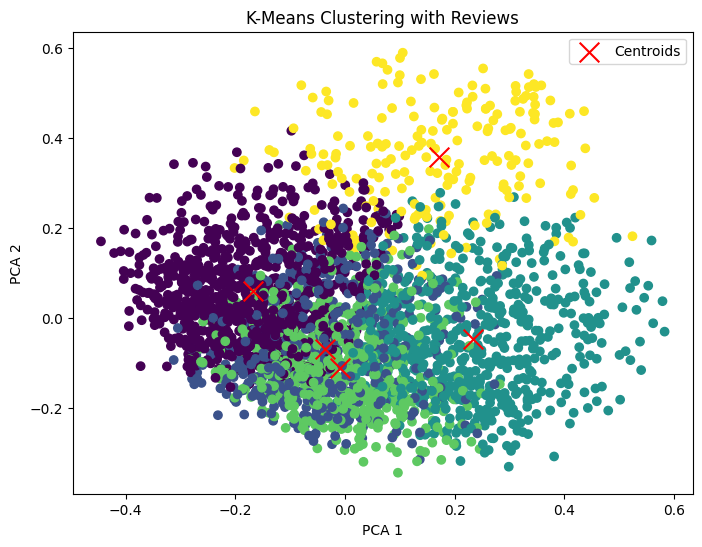

In [60]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(review_features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')

plt.title('K-Means Clustering with Reviews')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [38]:
def get_top_neighbors(row_index, df, clusters, n_neighbors):
  cluster_label = clusters[row_index]
  same_cluster_rows = np.where(clusters == cluster_label)[0]
  row_vector = df.iloc[row_index].values.reshape(1, -1)
  distances = euclidean_distances(row_vector, df.iloc[same_cluster_rows])
  nearest_neighbors = same_cluster_rows[np.argsort(distances[0])][1:n_neighbors+1]

  return nearest_neighbors

In [36]:
review_features_df = pd.DataFrame(review_features)

In [76]:
print(get_top_neighbors(8, review_features_df, labels, 5))

[1652 1385  385  675 1357]


In [81]:
review_data[1357]

{'main_category': 'Cell Phones & Accessories',
 'title': 'SAMSUNG Galaxy S22 5G 128GB Factory Unlocked SM-S901U1 Violet (Renewed)',
 'average_rating': 4.3,
 'rating_number': 41,
 'features': ['6.1", 1080 x 2340pixels, Infinity-O FHD+ Dynamic AMOLED 2X Display, 3700mAh Battery, Wireless Powershare',
  '128GB ROM, 8GB RAM, No SD Card Slot, Qualcomm SM8450 Snapdragon 8 Gen 1 (4 nm), Octa-Core, Adreno 730',
  'Rear Camera: 50MP, f/1.8 + 10MP, f/2.4 + 12MP, f/2.2, Front Camera: 10 MP, f/2.2, Android 12, One UI 4.1',
  '2G: GSM 850/900/1800/1900, CDMA 800/1900, 3G: HSDPA 850/900/1700(AWS)/1900/2100, CDMA2000 1xEV-DO, 4G LTE: 1/2/3/4/5/7/8/12/13/14/18/19/20/25/26/28/29/30/38/39/40/41/46/48/66/71, 5G: 1/3/5/7/8/20/28/38/41/66/71/260/261SA/NSA/Sub6/mmWave - Single SIM',
  'No Warranty. Compatible with Most GSM and CDMA Carriers like T-Mobile, AT&T, MetroPCS, etc. Will Also work with CDMA Carriers Such as Verizon, Sprint.'],
 'description': ['Galaxy S22 is redefining the epic standard – both for